# 11월 22일 월 공부

## 보스턴 주택 가격 데이터로 데이터 정제 실전 과제 수행

### 파일 : house_raw.csv

#### 1. 데이터 불러오기 및 탐색

In [1]:
# 데이터 불러오기 및 탐색
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/house_raw.csv')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17914 entries, 0 to 17913
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17914 non-null  int64  
 1   income       17914 non-null  float64
 2   bedrooms     17914 non-null  float64
 3   households   17914 non-null  float64
 4   rooms        17914 non-null  float64
 5   house_value  17914 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 839.8 KB


In [5]:
data['house_value'].value_counts()

137500    109
162500    102
112500     88
187500     84
225000     74
         ... 
225300      1
422700      1
330300      1
405500      1
40400       1
Name: house_value, Length: 3719, dtype: int64

In [8]:
data['housing_age'].value_counts()

36    814
35    779
16    724
17    655
34    641
26    587
33    580
32    530
18    523
25    519
37    492
15    478
19    471
27    455
30    449
24    446
28    438
20    435
29    433
31    422
23    418
21    411
14    380
38    369
22    353
39    348
42    344
44    337
43    335
13    286
40    281
41    276
45    266
10    245
46    234
11    224
12    217
5     198
9     188
47    187
8     178
48    165
4     144
7     139
6     136
49    125
50    122
3      46
2      44
51     43
1       4
Name: housing_age, dtype: int64

In [3]:
# 변수의 기술 통계 확인
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


#### 변수의 기술 통계 요약

##### housing_age : 명목형 변수 -> 주택 나이
##### income : 이산형 변수
##### bedrooms : 이산형 변수
##### households : 이산형 변수
##### rooms : 이산형 변수
##### house_value : 명목형 변수 -> 주택 가격

array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

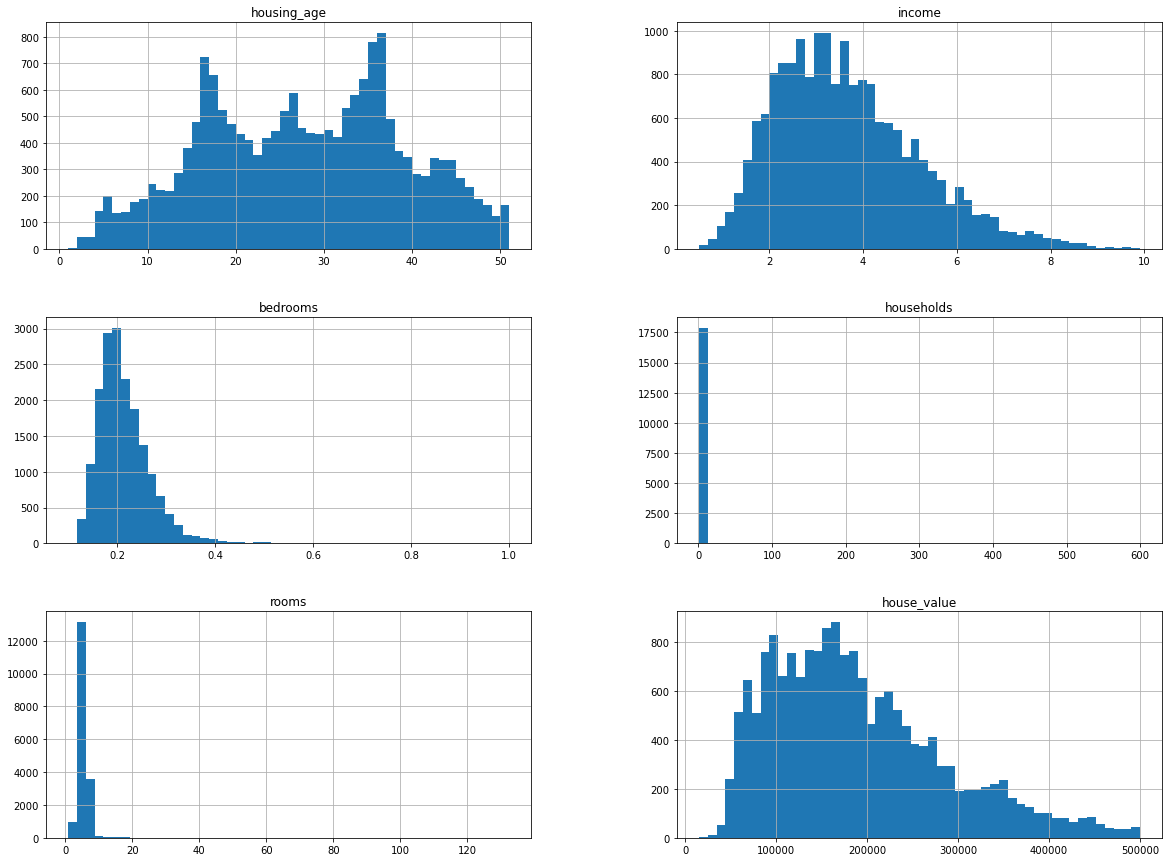

In [7]:
# 변수 별 히스토그램 확인
data.hist(bins=50, figsize=(20,15))

'''
bedrooms , households, rooms 에 너무 큰 값 존재하는 것으로 보임.
-> 자료들이 왼쪽에 몰려있음.
-> 이상치 의심 필요
'''

## 6.2 선형회귀 적용(정제 전 데이터)

### 본 분석의 목적은 주택가격(house_value)의 예측 -> 선형 회귀 적용

In [10]:
# 머신러닝 적용 (1) : X 와 y를 나눔 / 독립 변수와 종속 변수 구분

# x 에 house_age ~ rooms 까지 (독립 변수)
x = data[data.columns[0:5]]

# y 에 house_value (종속 변수)
y = data['house_value']

In [13]:
# 머신러닝 적용 (2) : 학습용 데이터(train data set)과 테스트용 데이터(test data set) 구분
# 학습용 데이터와 테스트용 데이터를 나누기 위한 라이브러리 : sklearn의 model_selection 에서 train_test_split
# X와 Y를 7:3의 비율로 나누어 x_train, X_test, Y_train, Y_test 에 할당
from sklearn.model_selection import train_test_split


# 학습용 데이터 - train 
# 테스트용 데이터 - test
X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=42)

In [14]:
# 머신러닝 적용 (3) : 독립변수 정규화
# 독립변수 정규화 :: 훈련데이터 및 테스트 데이터의 독립변수의 단위를 동일하게 만드는 과정
# Min-Max 방법 적용 : sklearn의 전처리 묘듈의 MinMaxScaler

# sklearn 라이브러리의 preprocessing 모듈에서 MinMaxScaler 임포트
from sklearn.preprocessing import MinMaxScaler

# scaler_minmax 에 MinMaxScaler() 함수 할당
scaler_minmax=MinMaxScaler()

# .fit('변수명') 사용하여 변수에 MinMaxScaler() 함수 적용
scaler_minmax.fit(X_train)

# .transform() 함수 : 특질들을 추출하는 함수로 기존에 있던 특질로부터 새로운 특질을 추출할 때 사용할 수 있다
# X_scaled_minmax_train 은 X_train 변수에 scaler_minmax를 적용해서 얻은 새로운 변수
X_scaled_minmax_train=scaler_minmax.transform(X_train)
# X_scaled_minmax_test 는 X_test 변수에 scaler_minmax를 적용해서 얻은 새로운 변수
X_scaled_minmax_test=scaler_minmax.transform(X_test)


In [16]:
# 머신러닝 적용 (4) : 모델 적용
# 선형 모델 LinearRegression 적용
# sklearn 라이브러리의 linear_model 모듈 중 LinearRegression 적용
from sklearn.linear_model import LinearRegression

# model 은 LinearRegression()
model = LinearRegression()

# model에 x,y 적용 :
# x는 적규화된 x_train 사용 : X_scaled_minmax_train 
# y는 Y_train
model.fit(X_scaled_minmax_train, Y_train)

LinearRegression()

In [18]:
# 머신러닝 적용 (5) : 모델 정확도 확인 - train 데이터
# 예측하기 : .predict()
pred_train=model.predict(X_scaled_minmax_train)

# 정확도 확인 : .score(x,y) 
model.score(X_scaled_minmax_train, Y_train)

0.5463729131516732

In [20]:
# 머신러닝 적용 (6) : 모델 정확도 확인 - test 데이터
# 예측하기 : .predict()
pred_train=model.predict(X_scaled_minmax_test)

# 정확도 확인 : .score(x,y)
model.score(X_scaled_minmax_test, Y_test)

# 정확도는 0~1 사이의 값이어야 하고 음수가 나올 수 없음!! -> 만일 이 범위를 벗어난다면 이상치제거나 결측치제거를 해야함.

-2.8220648010161558

## 6.3 데이터 정제를 위한 세부 검토

### bedrooms 변수

<AxesSubplot:>

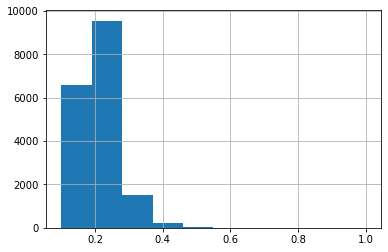

In [21]:
# bedrooms 변수에서는 0.6 이상의 값에 매우 큰 값이 존재함. 

data['bedrooms'].hist()

<AxesSubplot:>

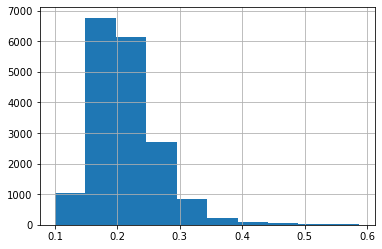

In [23]:
# 따라서 0.6 미만의 값만 확인해보기로 함.
# data_bedroom 이라는 변수에 data['bedrooms']가 0.6 미만인 것만 할당
data_bedroom=data[data['bedrooms']<0.6]

# data_bedrooms 의 히스토그램 확인
data_bedroom['bedrooms'].hist()

In [25]:
# bedrooms가 0.6 이상인 데이터가 몇 개인지 확인해보기로 함
# data_bedroom2 에 bedrooms 가 0.6 이상인 데이터 할당
data_bedroom2 = data[data['bedrooms']>=0.6]

# data_bedroom2 확인
print(data_bedroom2['bedrooms'].value_counts())
data_bedroom2

'''
총 14개의 데이터 -> 삭제하자.
'''

1.000000    3
0.686114    1
0.635258    1
0.750000    1
0.613084    1
0.602489    1
0.923077    1
0.625887    1
0.700000    1
0.627338    1
0.662539    1
0.658869    1
Name: bedrooms, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
1732,43,1.3157,0.602489,2.133660,1.911826,333300
1911,25,1.7866,0.635258,3.566327,1.678571,325000
3162,26,1.4904,0.658869,3.750779,1.598131,275000
3165,12,1.2012,0.613084,3.271233,1.465753,275000
5446,24,1.8304,0.662539,3.973545,1.708995,225000
7674,45,1.4940,0.625887,3.673981,1.768025,187500
7677,20,1.0938,0.923077,1.739130,1.130435,187500
9658,46,2.8750,1.000000,1.846154,0.846154,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11810,37,2.7634,0.700000,4.524194,1.411290,137500


### households 변수

<AxesSubplot:>

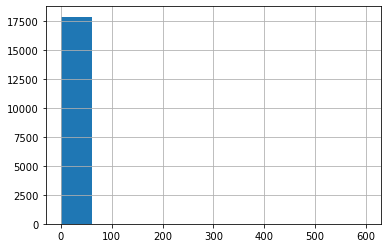

In [33]:
# households 변수의 히스토그램 확인
data['households'].hist()

<AxesSubplot:>

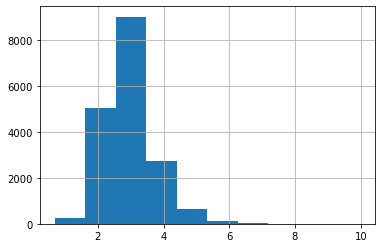

In [36]:
# households 변수는 10이상의 값에서 매우 큰 값 존재함
# 10 미만의 데이터 분포만 따로 저장
data_households = data[data['households']<10]
data_households['households'].hist()

In [40]:
# households 변수가 10 이상인 데이터만 따로 보기
data_households2 = data[data['households']>=10]
#data_households2의 갯수
print(data_households2.value_counts().sum())

#data_households2 상세
data_households2

'''
총 22개의 데이터가 있음 -> 제거해도 됨
'''

22


,housing_age,income,bedrooms,households,rooms,house_value
2420,20,1.0298,0.338658,13.693487,2.398467,300000
5398,33,3.8750,0.218310,12.234043,3.021277,225000
8003,36,4.2578,0.212528,33.952941,5.258824,183300
9617,26,5.7485,0.167702,51.400000,5.366667,162500
9625,36,4.6250,0.142857,14.000000,24.500000,162500
9703,8,1.6250,0.125000,63.750000,7.600000,162500
9713,19,0.9573,0.338843,16.048780,2.951220,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11397,13,3.4107,0.218182,12.843750,5.156250,142500
11987,41,3.5769,0.222672,18.500000,4.940000,135700


### rooms 변수

<AxesSubplot:>

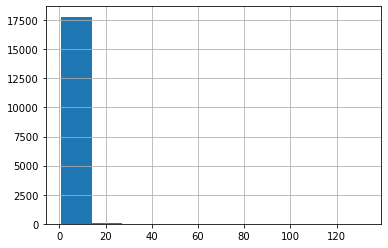

In [41]:
# Rooms 변수 히스토그램 확인
data['rooms'].hist()

# rooms 변수는 20 이상에서 매우 큰 값 존재

<AxesSubplot:>

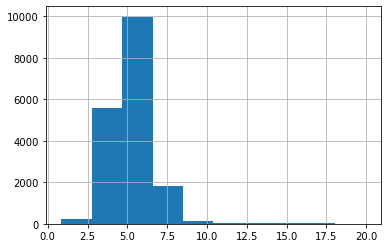

In [42]:
# rooms 변수 값이 20미만인 데이터만 따로 보기
data_rooms=data[data['rooms'] < 20]
data_rooms['rooms'].hist()

In [43]:
# rooms 변수 값이 20 이상인 데이터 확인하기
data_rooms2 = data[data['rooms'] >=20]

# data_rooms2 갯수 확인
print(data_rooms2['rooms'].value_counts().sum())

# data_rooms2 상세 
data_rooms2

'''
총 64개 -> 전체 데이터 17914 이므로 제거해도 괜찮음
'''

64


,housing_age,income,bedrooms,households,rooms,house_value
324,19,4.0714,0.177958,2.333333,61.812500,437500
457,17,2.1719,0.172918,2.581818,28.600000,420000
1140,18,5.5456,0.146182,2.273585,36.075472,360000
2146,17,3.9722,0.172642,2.608355,20.900783,313400
2858,14,4.1016,0.175109,2.136364,20.939394,283300
...,...,...,...,...,...,...
16222,11,3.1250,0.235332,2.484848,47.515152,77500
16429,16,0.4999,0.277372,1.368421,21.631579,73500
16584,10,3.1250,0.250564,2.285714,21.095238,71300
16844,25,2.6250,0.255741,1.750000,59.875000,67500


## 6.4 정제 데이터셋 생성

In [44]:
# 분석자가 임으로 정상데이터셋의 기준을 bedrooms < 0.5 , households < 7 , rooms < 12 로 설정
# 정상 데이터셋을 new_data로 저장
new_data = data[(data['bedrooms']<0.5) & (data['households']<7) & (data['rooms']<12)]
new_data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [45]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17689 entries, 0 to 17912
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 967.4 KB


In [46]:
#new_data의 기술통계확인
new_data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

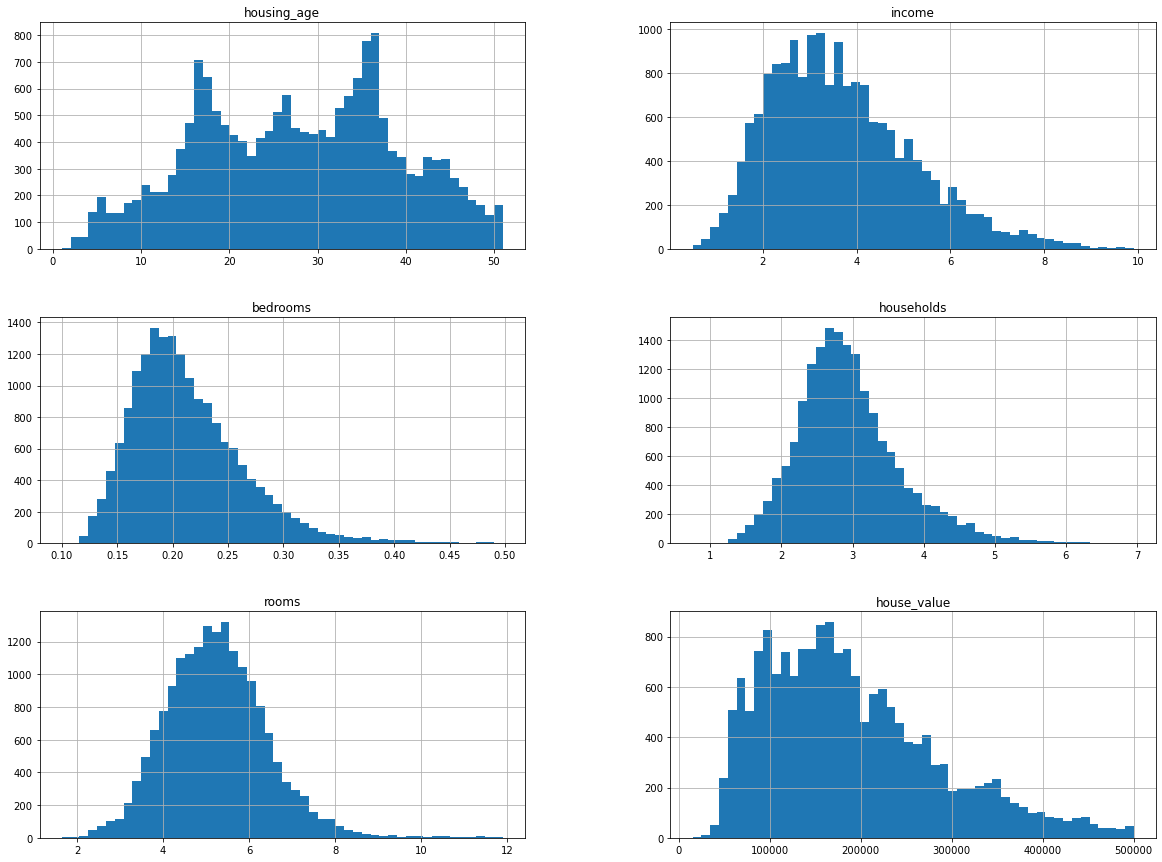

In [48]:
# new_data의 히스토그램 확인
new_data.hist(bins=50, figsize=(20,15))

## 6.5 선형회귀 적용 (정제 후 데이터)

In [51]:
# 머신러닝 적용 (1) : 독립변수, 종속변수 나누기
# X는 독립변수 : housing_age ~ rooms 까지
X=new_data[new_data.columns[0:5]]
# Y는 종속 변수
Y=new_data[['house_value']]

In [53]:
# 머신러닝 적용(2) : 학습용 데이터와 테스트용 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42)

In [57]:
# 머신러닝 적용(3) : 데이터 정규화
# minmax 정규화
from sklearn.preprocessing import MinMaxScaler

# minmax_scaler 함수 할당
minmax_scaler = MinMaxScaler()

#.fit 사용하여 X_train을 minmaxscaler적용
minmax_scaler.fit(X_train)

# .transform 사용하여 x_train과 x_test 에 minmaxscaler 적용한 변수 생성
X_minmax_scaled_train = minmax_scaler.transform(X_train)
X_minmax_scaled_test = minmax_scaler.transform(X_test)

In [59]:
# 머신러닝 적용(4) : 모델적용
# 선형회귀모델 적용
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_minmax_scaled_train, Y_train)

LinearRegression()

In [61]:
# 머신러닝 적용(5) : 점수 확인
# train 점수 확인
pred_train = model.predict(X_minmax_scaled_train)
print("훈련데이터 정확도:", model.score(X_minmax_scaled_train, Y_train))

훈련데이터 정확도: 0.5706921210926263


In [62]:
# test 점수 확인
pred_test = model.predict(X_minmax_scaled_test)
print("테스트데이터 정확도:", model.score(X_minmax_scaled_test, Y_test))

테스트데이터 정확도: 0.5826083517811866


In [63]:
new_data.to_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/house_price.csv', index=False)

# 2. 머신러닝 맛보기1 : 분류문제

#### 데이터 : 위스콘신 대학에서 공개한 유방암 진단 데이터
#### 목적변수 Y : 'class' - 0(정상) , 1(환자:유방암)
#### 그 외 모든 변수 X : 독립변수

### 2.1 분석 데이터 검토


In [1]:
# 분석 데이터 불러와서 데이터 확인
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/breast-cancer-wisconsin.csv')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [8]:
# 레이블 변수(유방암) 비율 확인
data['Class'].value_counts()



0    444
1    239
Name: Class, dtype: int64

In [7]:
# 행과 열 구조 확인
print(data.shape) 

'''
행 : 683
열 : 11
'''

(683, 11)


### 2.2 특성(x)과 레이블(y) 나누기

#### 1) 컬럼 이름으로 나누는 방법
#### 2) 컬럼 인덱스(위치값)으로 나누는 방법
#### 3) loc으로 나누는 방법


In [10]:
# 방법1 : 컬럼 이름으로 나누는 방법
X1 = data[['Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion',
'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']]


In [14]:
# 방법2 : 컬럼 인덱스(위치값)으로 나누는 방법
X2 = data[data.columns[1:10]]

In [15]:
# 방법3 : loc로 나누는 방법
X3 = data.loc[: , 'Clump_Thickness':'Mitoses']

In [16]:
print("X1: ", X1.shape)
print("X2: ", X2.shape)
print("X3: ", X3.shape)

X1:  (683, 9)
X2:  (683, 9)
X3:  (683, 9)


In [19]:
# y 레이블
Y = data[['Class']]

In [20]:
# train-test 데이터셋 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,stratify=y,random_state=42)


In [22]:
# stratify = y 옵션 확인

# Y_train 의 0,1 비율 확인
print(Y_train.mean())

# Y_test 의 0,1 비율 확인
print(Y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


In [28]:
# 사이킷런 라이브러리에서 표준화 함수 임포트
from sklearn.preprocessing import StandardScaler
scaler_standard=StandardScaler() # 생략가능

In [25]:
# 사이킷런 라이브러리에서 MinMaxScaler 함수 임포트
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler()

In [26]:
# train data의 정규화

#fit
scaler_minmax.fit(X_train)

#transform
X_scaled_minmax_train=scaler_minmax.transform(X_train)


In [29]:
# standard 정규화

#fit
scaler_standard.fit(X_train)

#transform
X_scaled_standard_train=scaler_standard.transform(X_train)

In [32]:
# minmax scale 확인
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# standard 방식 확인
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-1.548241e-16,-1.543904e-16,-1.353084e-16,1.149254e-16,5.767956e-17,1.674008e-16,-2.775558e-17,-3.642919e-17,6.938894e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


In [35]:
# test data 를 standard로 정규화
X_scaled_standard_test=scaler_standard.transform(X_test)

#X_scaled_standard_test의 describe 확인
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


In [36]:
# test data minmax정규화

X_scaled_minmax_test=scaler_minmax.transform(X_test)

# X_scaled_minmax_test 기술통계량확인
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# 사이킷러너 라이브러리에서 선형회귀 중 로지스틱회귀 함수 임포트
from sklearn.linear_model import LogisticRegression

# model 지정
model=LogisticRegression() # 생략 가능

# model에 데이터 fit
model.fit(X_scaled_minmax_train, Y_train)

/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [38]:
# 예측치 구하기
pred_train = model.predict(X_scaled_minmax_train)


In [39]:
# 성능 구하기
model.score(X_scaled_minmax_train, Y_train)

0.97265625

In [40]:
# 사이킷러너 라이브러리에서 선형회귀 중 로지스틱회귀 함수 임포트
from sklearn.linear_model import LogisticRegression

# model 지정
model=LogisticRegression() # 생략 가능

# model에 데이터 fit
model.fit(X_scaled_minmax_test, Y_test)

/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [41]:
# 예측치 구하기
pred_test = model.predict(X_scaled_minmax_train)


In [42]:
# 성능 구하기
model.score(X_scaled_minmax_test, Y_test)

0.9473684210526315